<a href="https://colab.research.google.com/github/apoorv1302/Cartoonizing_an_Image/blob/main/Apoorvverma_0801CA221010_cartonizing_an_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import userdata
userdata.get('secretName')

In [ ]:
from google.colab import userdata
userdata.get('secretName')

In [ ]:
from google.colab import userdata
userdata.get('secretName')

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving abc.jpeg to abc.jpeg


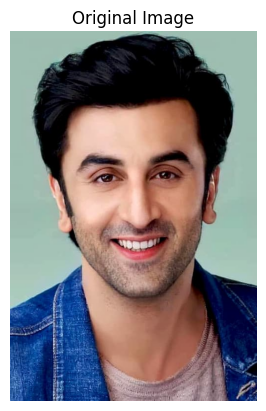

In [ ]:
image_path = 'abc.jpeg' # Replace with the actual image file name
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.title('Original Image')
plt.show()


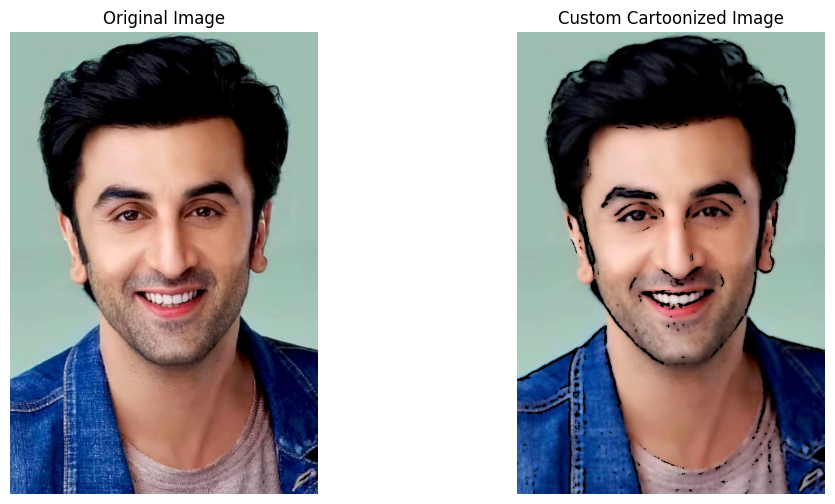

In [ ]:
def custom_cartoonize(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply median blur to the grayscale image
    gray_blur = cv2.medianBlur(gray, 7)

    # Detect edges using adaptive thresholding
    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)

    # Create a color cartoon effect by reducing color levels
    color = cv2.pyrDown(image)
    color = cv2.pyrUp(color)

    # Combine the color and edges
    cartoon = cv2.bitwise_and(color, color, mask=edges)

    return cartoon

cartoon_image = custom_cartoonize(image)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.axis('off')
plt.title('Original Image')


plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(cartoon_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Custom Cartoonized Image')

plt.show()


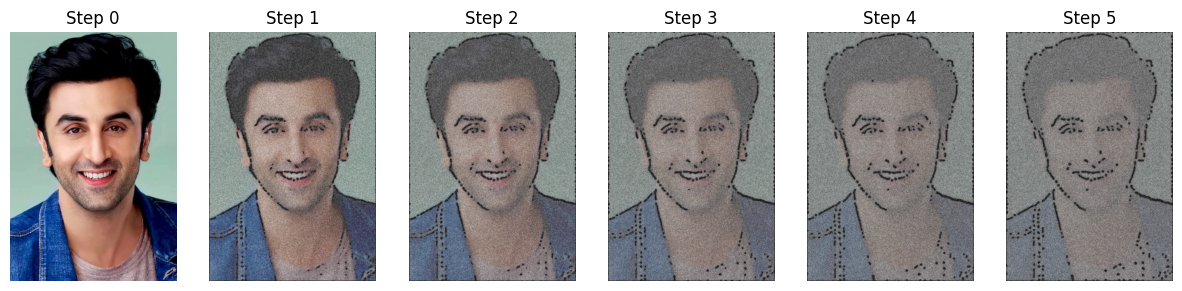

In [ ]:

# Function to create a cartoonized image with added features
def custom_cartoonize(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply bilateral filter to reduce noise and keep edges sharp
    gray_blur = cv2.bilateralFilter(gray, d=9, sigmaColor=300, sigmaSpace=75)

    # Detect edges using adaptive thresholding
    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)

    # Create a color cartoon effect by reducing color levels
    color = cv2.pyrDown(image)
    color = cv2.pyrUp(color)

    # Combine the color and edges
    cartoon = cv2.bitwise_and(color, color, mask=edges)

    # Add contour lines to the cartoonized image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(cartoon, contours, -1, (0, 0, 0), thickness=1)

    # Add texture using a stippling effect
    h, w, _ = cartoon.shape
    noise = np.random.randint(0, 256, (h, w), dtype=np.uint8)
    cartoon = cv2.addWeighted(cartoon, 0.7, cv2.cvtColor(noise, cv2.COLOR_GRAY2BGR), 0.3, 0)

    return cartoon

# Create the cartoonized image with added features
cartoon_image = custom_cartoonize(image)

# Create a list to store intermediate images
intermediate_images = []

# Add the original image to the list
intermediate_images.append(image_rgb)

# Perform the cartoonization process step by step
for step in range(1, 6):  # Adjust the number of steps as needed
    # Perform one step of the cartoonization process
    cartoon_image = custom_cartoonize(cartoon_image)

    # Convert to RGB format for displaying with Matplotlib
    cartoon_rgb = cv2.cvtColor(cartoon_image, cv2.COLOR_BGR2RGB)

    # Add the current cartoonized image to the list of intermediate images
    intermediate_images.append(cartoon_rgb)

# Display the images step by step
plt.figure(figsize=(15, 6))
for i, img in enumerate(intermediate_images):
    plt.subplot(1, len(intermediate_images), i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Step {i}')

plt.show()


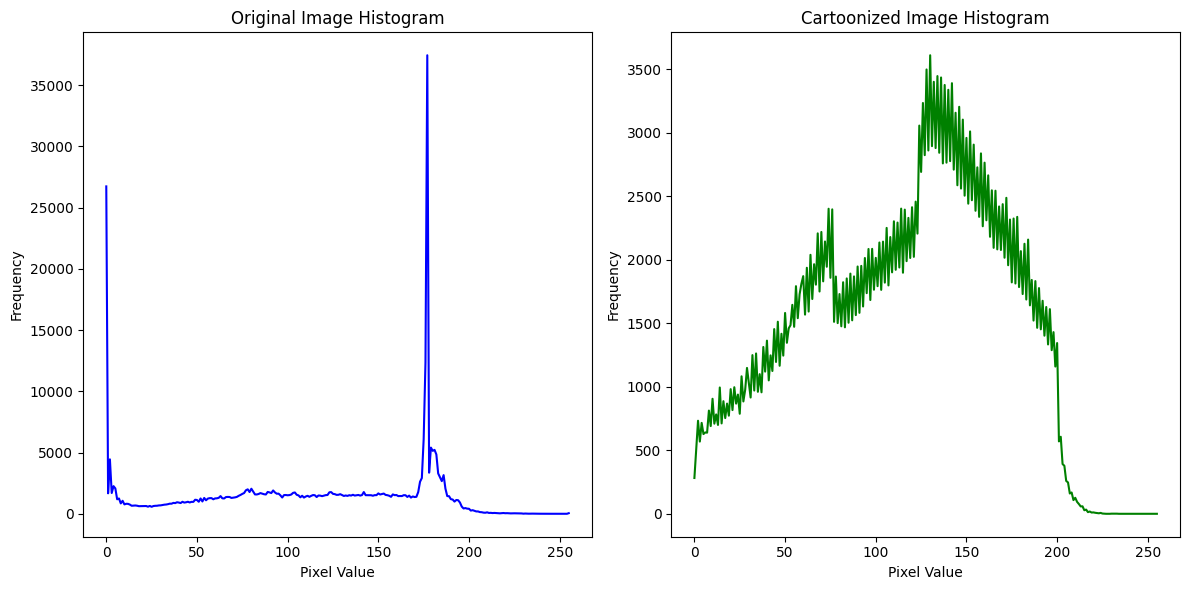

In [ ]:

# Create the cartoonized image with added features
cartoon_image = custom_cartoonize(image)

# Compute histograms for the original and cartoonized images
hist_original = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_cartoon = cv2.calcHist([cartoon_image], [0], None, [256], [0, 256])

# Plot histograms in color
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(hist_original, color='b')
plt.title('Original Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.plot(hist_cartoon, color='g')
plt.title('Cartoonized Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
